In [76]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
data = pd.read_csv("tsa_train.csv")
new = pd.read_csv("tsa_test.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [77]:
data.shape

(2077, 3)

In [78]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [79]:
data['label'].value_counts()

0    1928
1     149
Name: label, dtype: int64

# Preprocessing Data 

In [80]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() #

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['tweet'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['tweet'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Split into train-test

In [81]:
from sklearn.model_selection import train_test_split
X=data[['tweet', 'body_len', 'punct%']]
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [82]:
from sklearn.model_selection import train_test_split
X=data[['tweet', 'body_len', 'punct%']]
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Vectorise Text

In [83]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['tweet'])

tfidf_train = tfidf_vect_fit.transform(X_train['tweet'])
tfidf_test = tfidf_vect_fit.transform(X_test['tweet'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,5117,5118,5119,5120,5121,5122,5123,5124,5125,5126
0,51,5.9,0.109255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762025,0.0
1,58,5.2,0.083327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,61,9.8,0.063664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,48,14.6,0.063740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,31,9.7,0.110597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Final Evaluation of models

In [84]:
y = data['tweet']

In [85]:
from collections import Counter
c=Counter(y)

In [86]:
c

Counter({' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run': 1,
         "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked": 1,
         '  bihday your majesty': 1,
         '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ': 26,
         ' factsguide: society now    #motivation': 1,
         '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ': 1,
         ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦': 1,
         "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl": 1,
         'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavalier

In [87]:
from sklearn.svm import SVC

In [88]:
classifier = SVC(kernel = 'linear', random_state = 0)

In [89]:
classifier.fit(X_train_vect, y_train)

SVC(kernel='linear', random_state=0)

In [90]:
y_pred = classifier.predict(X_test_vect)

In [91]:
from sklearn.metrics import confusion_matrix


In [92]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[378   3]
 [ 29   6]]


Text(324.78000000000003, 0.5, 'predicted label')

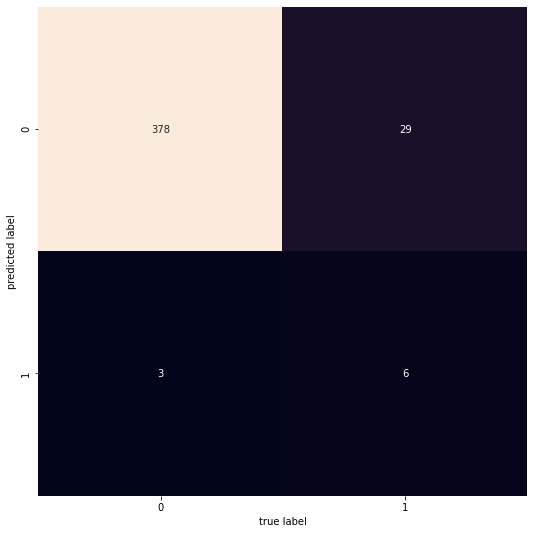

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, y_pred)*100

92.3076923076923

In [96]:
from sklearn.metrics import classification_report

In [97]:
print('\nSVM Linear Kernel Classification Report:\n', classification_report(y_test, y_pred))


SVM Linear Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       381
           1       0.67      0.17      0.27        35

    accuracy                           0.92       416
   macro avg       0.80      0.58      0.62       416
weighted avg       0.91      0.92      0.90       416



# -------------------------

In [98]:
classifier = SVC(kernel = 'rbf', random_state = 0)

In [99]:
classifier.fit(X_train_vect, y_train)

SVC(random_state=0)

In [100]:
y_pred = classifier.predict(X_test_vect)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[381   0]
 [ 35   0]]


In [103]:
confusion_matrix(y_test, y_pred)

array([[381,   0],
       [ 35,   0]], dtype=int64)

Text(324.78000000000003, 0.5, 'predicted label')

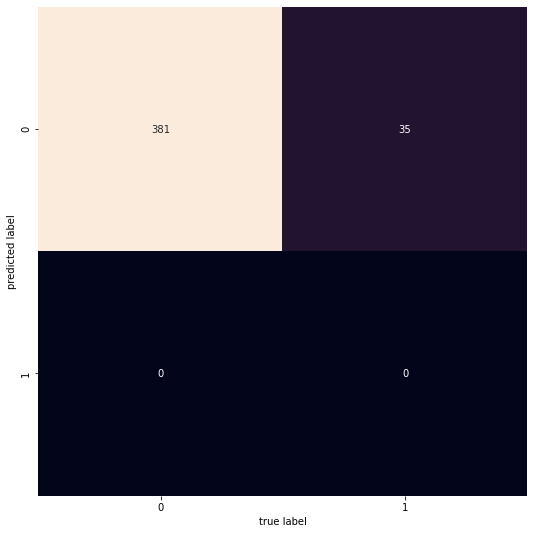

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, y_pred)*100

91.58653846153845

In [107]:
from sklearn.metrics import classification_report

In [108]:
print('\nSVM Radial Kernel Classification Report:\n', classification_report(y_test, y_pred))


SVM Radial Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       381
           1       0.00      0.00      0.00        35

    accuracy                           0.92       416
   macro avg       0.46      0.50      0.48       416
weighted avg       0.84      0.92      0.88       416



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ------------------------

In [109]:
classifier = SVC(kernel = 'poly', random_state = 0)

In [110]:
classifier.fit(X_train_vect, y_train)

SVC(kernel='poly', random_state=0)

In [111]:
y_pred = classifier.predict(X_test_vect)

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[381   0]
 [ 35   0]]


In [114]:
confusion_matrix(y_test, y_pred)

array([[381,   0],
       [ 35,   0]], dtype=int64)

Text(324.78000000000003, 0.5, 'predicted label')

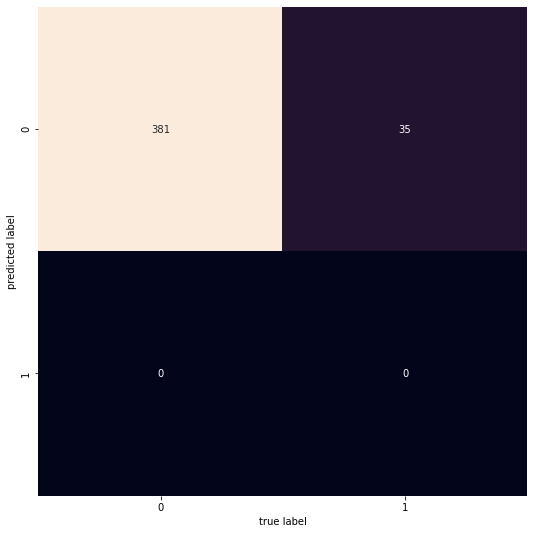

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test, y_pred)*100

91.58653846153845

In [118]:
from sklearn.metrics import classification_report

In [119]:
print('\nSVM Polynomial Kernel Classification Report:\n', classification_report(y_test, y_pred))


SVM Polynomial Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       381
           1       0.00      0.00      0.00        35

    accuracy                           0.92       416
   macro avg       0.46      0.50      0.48       416
weighted avg       0.84      0.92      0.88       416



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
new = X_train_vect.iloc[767,:].values
new = new.reshape(1, -1)
new

array([[50.        ,  6.        ,  0.07835413, ...,  0.        ,
         0.        ,  0.        ]])

In [121]:
classifier.predict(new)[0]

0

# -----------------

In [122]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)

In [123]:
classifier.fit(X_train_vect, y_train)

SVC(kernel='sigmoid', random_state=0)

In [124]:
y_pred = classifier.predict(X_test_vect)

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[375   6]
 [ 34   1]]


In [127]:
confusion_matrix(y_test, y_pred)

array([[375,   6],
       [ 34,   1]], dtype=int64)

Text(324.78000000000003, 0.5, 'predicted label')

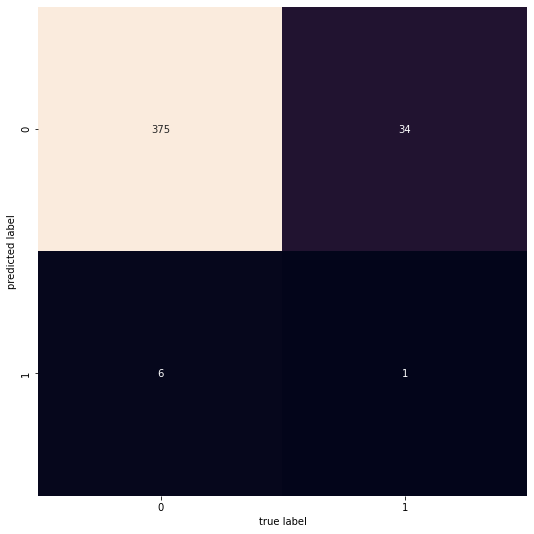

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(y_test, y_pred)*100

90.38461538461539

In [131]:
from sklearn.metrics import classification_report

In [132]:
print('\nSVM Sigmoid Kernel Classification Report:\n', classification_report(y_test, y_pred))


SVM Sigmoid Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       381
           1       0.14      0.03      0.05        35

    accuracy                           0.90       416
   macro avg       0.53      0.51      0.50       416
weighted avg       0.85      0.90      0.87       416

